# Workflow for the CRC1333 project B07 - Technical Chemistry

**Import necessary packages.**

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import networkx as nx
# import pandas as pd

from datetime import datetime
from sdRDM import DataModel
from modules import GCParser
from modules import GstaticParser
from modules import MFMParser
from modules import Calculator
from modules import get_volumetric_flow_mean
from modules import get_initial_time_and_current
from modules import assign_peaks
from pathlib import Path
# from DEXPI2sdRDM import DEXPI2sdRDM

**Load data model from git or markdown file**

In [2]:
# lib = DataModel.from_markdown('specifications/datamodel_b07_tc.md')
# lib = DataModel.from_git(url='https://github.com/FAIRChemistry/datamodel_b07_tc.git')

**Set path to current working directory and available datasets.**

In [3]:
# Get the current working directory
current_directory = Path.cwd()

# Set the path for the datasets
path_to_dataset = current_directory / 'datasets'

In [4]:
# List all files in the directory
files = path_to_dataset.iterdir()

# Filter the files with .json extension
json_files = {index:file for index, file in enumerate(files) if file.suffix == ".json"}

# Print the JSON file names
for index, file in json_files.items():
    print(f"{index}: {file.name}")

0: b07.json


**Choose dataset to parse.**

In [5]:
index_dataset = 0

**Load dataset for project B07**

In [6]:
dataset, lib = DataModel.parse(json_files[index_dataset])

**Instantiate an experiment object which holds all the information about one single experiment.**

In [7]:
experiment = lib.Experiment()
dataset.experiments.append(experiment)

In [8]:
# print(dataset.json())

### **Parsing experimental data and metadata from various output files.**

### gstatic

**Create an instance of the ``GstaticParser`` to parse Gamry output files and show available files in the selected directory.**

In [9]:
gstaticparser = GstaticParser(current_directory / 'data')
dict_of_gstatic_files = gstaticparser.enumerate_available_files()
for index, gstatic_file in dict_of_gstatic_files.items():
    print(f"{index}: {gstatic_file}")
# available_files = gstaticparser.available_files
# print(available_files)

0: GSTATIC(Potentiostat)


**Chose specific file.**

In [10]:
gstatic_file = dict_of_gstatic_files[0]
gstatic_file

'GSTATIC(Potentiostat)'

**Extract the metadata from it using the ``GstaticParser`` and load into the data model.**

In [11]:
gstatic_metadata_df, gstatic_metadata = gstaticparser.extract_metadata(gstatic_file)
potentiometric_measurement = lib.Measurement(measurement_type=lib.enums.MeasurementType.POTENTIOSTATIC, metadata=gstatic_metadata)
experiment.measurements = [potentiometric_measurement]
gstatic_metadata_df

,Parameter,Data_type,Value,Description
0,PSTAT,PSTAT,REF3000-19129,Potentiostat
1,IINIT,QUANT,-2.00000E+002,Initial I (mA/cm^2)
2,TINIT,QUANT,3.60000E+003,Initial Time (s)
3,IFINAL,QUANT,-2.00000E+002,Final I (mA/cm^2)
4,TFINAL,QUANT,0.00000E+000,Final Time (s)
5,SAMPLETIME,QUANT,1.00000E+000,Sample Period (s)
6,AREA,QUANT,1.00000E+000,Sample Area (cm^2)
7,DENSITY,QUANT,7.87000E+000,Density (g/cm^3)
8,EQUIV,QUANT,2.79200E+001,Equiv. Wt
9,IRCOMP,TOGGLE,T,IR Comp


### Mass flow meter

**Create an instance of the ``MFMParser`` to parse MFM output files and show available files in the selected directory.**

In [12]:
mfmparser = MFMParser(current_directory / 'data')
dict_of_mfm_files = mfmparser.enumerate_available_files()
for index, mfmfile in dict_of_mfm_files.items():
    print(f"{index}: {mfmfile}")

0: Bench-2h-GSS_D9-pH70-1303-C4-2103-1_200_50c_24h
1: data
2: PX409-USBH
3: test_data_mfm


**Chose specific file**

In [13]:
mfm_file = dict_of_mfm_files[3]
mfm_file

'test_data_mfm'

**Extract the experimental data from it using the ``MFMParser`` and load into the data model.**

In [14]:
mfm_experimental_data_df, mfm_experimental_data = mfmparser.extract_exp_data(mfm_file)
mfm = lib.Measurement(
            measurement_type=lib.enums.MeasurementType.MFM.value,
            experimental_data=[value for value in mfm_experimental_data.values()],
        )
experiment.measurements.append(mfm)

**Print first 10 rows of the mfm experimental data.**

In [15]:
truncated_mfm_experimental_data_df= mfm_experimental_data_df.truncate(after=10)
truncated_mfm_experimental_data_df

,Datetime,Time,Signal,Flow_rate
0,2023-03-21 12:14:06,7002,2337,3.651953
1,2023-03-21 12:14:08,7004,2333,3.645957
2,2023-03-21 12:14:10,7006,2340,3.656559
3,2023-03-21 12:14:12,7008,2337,3.651343
4,2023-03-21 12:14:14,7010,2345,3.664264
5,2023-03-21 12:14:16,7012,2336,3.650289
6,2023-03-21 12:14:18,7014,2313,3.613605
7,2023-03-21 12:14:20,7016,2323,3.630366
8,2023-03-21 12:14:22,7018,2337,3.652303
9,2023-03-21 12:14:24,7020,2356,3.681728


### Gas chromatography

**Create an instance of the ``GCParser`` to parse GC output files and show available files in the selected directory.**

In [16]:
gcparser = GCParser(current_directory / 'data')
dict_of_gc_files = gcparser.enumerate_available_files()
for index, gc_file in dict_of_gc_files.items():
    print(f"{index}: {gc_file}")

0: report00
1: REPORT01


**Select gc file that contains the metadata**

In [17]:
gc_metadata_file = dict_of_gc_files[0]

**Select file that contains the experimental data**

In [18]:
gc_experimental_data_file = dict_of_gc_files[1]

**Extract the metadata and experimental data from them and load into the dataset.**

In [19]:
gc_metadata_df, gc_metadata= gcparser.extract_metadata(gc_metadata_file)
gc_experimental_data_df, gc_experimental_data = gcparser.extract_exp_data(gc_experimental_data_file)
gc = lib.Measurement(
    measurement_type=lib.enums.MeasurementType.GC.value,
    metadata=[value for value in gc_metadata.values()],
    experimental_data=[value for value in gc_experimental_data.values()]
)
experiment.measurements.append(gc)
gc_metadata_df

,parameter,value,description
0,Sample Name,NaN,NaN
1,Sample Info,NaN,NaN
2,Data File,D:\GC\Kurz\D9-pH70-1303-C4-2103-1\JH-1H 2023-0...,NV-F0201.D
3,Acq. Instrument,Instrument 1,NaN
4,Analysis Method,D:\GC\Kurz\D9-pH70-1303-C4-2103-1\JH-1H 2023-0...,JH_GASPRODUKTE_30MIN.M
5,Method Info,NaN,NaN
6,Results Created,21.03.2023 12:44:58,NaN
7,Results Created by,MS,NaN
8,Acq. Method,JH_GASPRODUKTE_30MIN.M,NaN
9,Injection Date,"21-Mar-23, 12:14:56",NaN


In [20]:
gc_experimental_data_df

,Peak_number,Retention_time,Signal,Peak_type,Peak_area,Peak_height,Peak_area_percentage
0,1,1.734678,1,BBAN,61.917892,12.646031,0.071954
1,2,2.905288,1,BBA,70992.437500,4047.076660,82.499118
2,3,3.420898,2,BV,206.927628,56.432930,0.240467
3,4,3.652101,2,VB,59.064323,20.202883,0.068638
4,5,6.014212,2,BB,6365.441895,1324.453613,7.397173
5,6,13.005888,1,BV,1924.299561,50.554913,2.236196
6,7,14.186999,2,BB,183.061951,59.090946,0.212733
7,8,15.824186,1,VV,2871.221191,20.406471,3.336598
8,9,17.882446,1,VV,2126.794922,16.856892,2.471513
9,10,20.661367,1,VB,1031.903687,8.965669,1.199158


**Print current state of the data model**

In [21]:
print(experiment.json())

{
  "id": "experiment0",
  "measurements": [
    {
      "id": "measurement0",
      "measurement_type": "Potentiostatic Measurement",
      "metadata": [
        {
          "id": "metadata0",
          "parameter": "PSTAT",
          "value": "REF3000-19129",
          "data_type": "PSTAT",
          "description": "Potentiostat"
        },
        {
          "id": "metadata1",
          "parameter": "IINIT",
          "value": "-2.00000E+002",
          "data_type": "QUANT",
          "description": "Initial I (mA/cm^2)"
        },
        {
          "id": "metadata2",
          "parameter": "TINIT",
          "value": "3.60000E+003",
          "data_type": "QUANT",
          "description": "Initial Time (s)"
        },
        {
          "id": "metadata3",
          "parameter": "IFINAL",
          "value": "-2.00000E+002",
          "data_type": "QUANT",
          "description": "Final I (mA/cm^2)"
        },
        {
          "id": "metadata4",
          "parameter": "TFINAL

**Assign peak areas to species.** \
The peak areas recorded by the GC have to be matched with the correct species. The individial ``Area`` is selected by its corresponding ``Peak_Number``. It is possible that the same species is accountable for multiple peaks, i.d. multiple peaks are assigned to the same species.


In [22]:
assign_peak_dict={
    'H2': [1],
    'CO2': [2],
    'CO': [6],
    'CH4': [3],
    # 'C2H4': [5],
    # 'C2H6': [4],
}
peak_area_dict = assign_peaks(dataset, assign_peak_dict)

for species, peak_area in peak_area_dict.items():
    print(f"{species}: {peak_area}")

H2: 61.9178924560547
CO2: 70992.4375
CO: 1924.29956054688
CH4: 206.927627563477


**Set calibration input values and import into the data model.** \
To determine the concentrations of the individual species, a calibration has to be performed in advance to match the individual values for ``Area`` with their corresponding concentrations.

In [23]:
calibration_input_dict={
    'H2': [
        lib.enums.Species.HYDROGEN,
        [71,153,330],
        [5,10,20]
        ],
    'CO':[
        lib.enums.Species.CARBONMONOXIDE,
        [797,1328,7223],
        [0.5,1,5]
    ],
    'CO2': [
        lib.enums.Species.CARBONDIOXIDE,
        [0,38653],
        [0,50]
    ],
    'CH4':[
        lib.enums.Species.METHANE,
        [5727,11991],
        [5,10]
    ],
    # 'C2H4':[
    #     lib.enums.Species.ETHENE,
    #     [1122,4864,7297],
    #     [0.5,2,3]
    # ],
    # 'C2H6':[
    #     [0,12168],
    #     [0,5],
    #     lib.enums.Species.ETHANE
    # ],
}

**Instantiate the ``Calculator`` module.**

In [24]:
calculator=Calculator(path_to_dataset=path_to_dataset)

**Calibrate using the ``calibrate`` method of the ``Calculator`` module.**

In [25]:
calibration_df, calibration_dict=calculator.calibrate(calibration_input_dict)
calibration_df
# for species, value in calibration_dict.items():
#     print(f"{species}: {value}")
#     # print(lib.Calibration(value))

,Peak_areas,Concentrations,Slope,Intercept,Coefficient_of_determination
H2,"[71.0, 153.0, 330.0]","[5.0, 10.0, 20.0]",0.057688,1.013564,0.999656
CO,"[797.0, 1328.0, 7223.0]","[0.5, 1.0, 5.0]",0.000691,0.012657,0.99927
CO2,"[0.0, 38653.0]","[0.0, 50.0]",0.001294,0.0,1.0
CH4,"[5727.0, 11991.0]","[5.0, 10.0]",0.000798,0.42864,1.0


In [67]:
i=1
j=0
for count in range(1, 10):
    print('count:', count)
    print('i:', i)
    if count%2==0:
        i += 1 
        j = 2
    else:
        j = 1
    print('j:', j)
    # print(count, '.loop')


count: 1
i: 1
j: 1
count: 2
i: 1
j: 2
count: 3
i: 2
j: 1
count: 4
i: 2
j: 2
count: 5
i: 3
j: 1
count: 6
i: 3
j: 2
count: 7
i: 4
j: 1
count: 8
i: 4
j: 2
count: 9
i: 5
j: 1


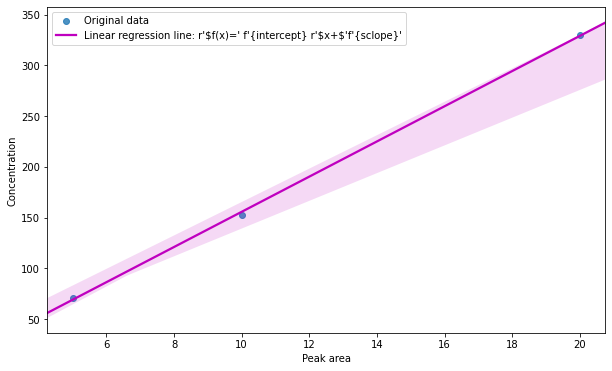

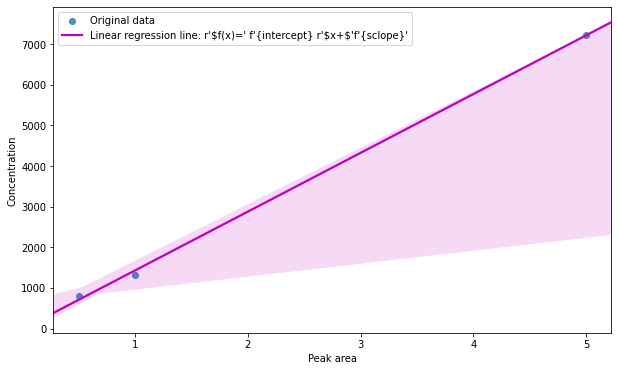

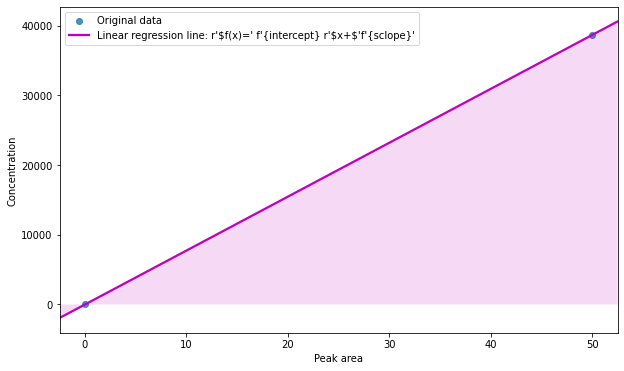

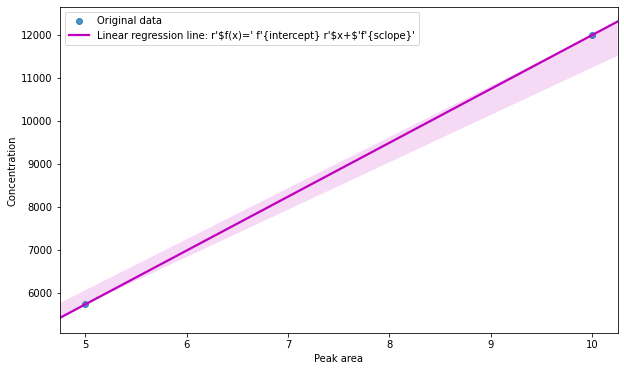

In [26]:
calculator.plot_calibration()

In [27]:
analysis = lib.Analysis()
analysis.calibrations = [calibration for calibration in calibration_dict.values()]
experiment.analysis = analysis

**Print current state of the dataset**

In [28]:
print(experiment.json())

{
  "id": "experiment0",
  "measurements": [
    {
      "id": "measurement0",
      "measurement_type": "Potentiostatic Measurement",
      "metadata": [
        {
          "id": "metadata0",
          "parameter": "PSTAT",
          "value": "REF3000-19129",
          "data_type": "PSTAT",
          "description": "Potentiostat"
        },
        {
          "id": "metadata1",
          "parameter": "IINIT",
          "value": "-2.00000E+002",
          "data_type": "QUANT",
          "description": "Initial I (mA/cm^2)"
        },
        {
          "id": "metadata2",
          "parameter": "TINIT",
          "value": "3.60000E+003",
          "data_type": "QUANT",
          "description": "Initial Time (s)"
        },
        {
          "id": "metadata3",
          "parameter": "IFINAL",
          "value": "-2.00000E+002",
          "data_type": "QUANT",
          "description": "Final I (mA/cm^2)"
        },
        {
          "id": "metadata4",
          "parameter": "TFINAL

In [29]:
print(calibration_df.loc[species][1])

[5.0, 10.0]


**Calculate volumetric fractions.**

In [30]:
volumetric_fractions_df = calculator.calculate_volumetric_fractions(peak_area_dict=peak_area_dict, calibration_df=calibration_df)
volumetric_fractions_df

,Volumetric_fraction
H2,4.585501
CO,1.342875
CO2,91.833024
CH4,0.593812


**Set the correction factors.**

In [31]:
correction_factors_dict= {
    'H2':1.01,
    'CO':0.74,
    'CO2':1.00,
    'CH4':0.76,
    # 'C2H4':,
    # 'C2H6':,
}

**Calculate the conversion factor using the correction factors.**

In [32]:
conversion_factor = calculator.calculate_conversion_factor(
    volumetric_fractions_df=volumetric_fractions_df, correction_factors_dict=correction_factors_dict
)
conversion_factor

0.9698176246539418

**Get mean flow rate at the time of the gc measurement.**

In [33]:
volumetric_flow_mean = get_volumetric_flow_mean(experiment, 10)
volumetric_flow_mean

3.79809261904762

**Calculate the real volumetric flow.**

In [34]:
real_volumetric_flow = volumetric_flow_mean*conversion_factor
real_volumetric_flow

3.6834571620204315

In [35]:
# vol_flow_real= calculator.calculate_real_volumetric_flow(conversion_factor = conversion_factor, measured_volumetric_flow_mean = vol_flow_mean )
# vol_flow_real

In [36]:
volumetric_flow_fractions_df=calculator.calculate_volumetric_flow_fractions(
    real_volumetric_flow=real_volumetric_flow, volumetric_fractions_df=volumetric_fractions_df
)
volumetric_flow_fractions_df

,Volumetric_flow_fraction
H2,16.890495
CO,4.946423
CO2,338.26301
CH4,2.187281


**Calculate material flow.**

In [37]:
material_flow_df = calculator.calcualte_material_flow(volumetric_flow_fractions_df=volumetric_flow_fractions_df)
material_flow_df

,Material_flow
H2,0.75357
CO,0.220685
CO2,15.091615
CH4,0.097586


**Get initial current in mA and initial time in s.**

In [38]:
initial_current, initial_time = get_initial_time_and_current(experiment)
print(f'Initial current in mA: {initial_current}')
print(f'Initial time in s: {initial_time}')

Initial current in mA: -200.0
Initial time in s: 3600.0


**Calculate theoretical material flow.**

In [39]:
electrode_surface_area = 1.0 # cm^2
theoretical_material_flow_df=calculator.calculate_theoretical_material_flow(
    initial_current=initial_current, initial_time=initial_time, electrode_surface_area=electrode_surface_area
)
theoretical_material_flow_df

,Theoretical_material_flow
H2,0.000062
CO,0.000062
CO2,0.000062
CH4,0.000016
C2H4,0.00001
C2H6,0.000008


In [40]:
for species, material_flow in material_flow_df['Material_flow'].items():
    print(species, material_flow)


H2 0.7535699963626504
CO 0.22068482592404684
CO2 15.091615485592387
CH4 0.09758561173354853


**Calculate Faraday efficiency and load into dataset.**

In [41]:
faraday_efficiency_df = material_flow_df['Material_flow'] / theoretical_material_flow_df['Theoretical_material_flow']
faraday_efficiency_df

C2H4              NaN
C2H6              NaN
CH4       6277.053438
CO         3548.80812
CO2     242686.588675
H2       12118.075227
dtype: object

In [42]:
dataset.experiments.append(experiment)

In [43]:
with open(json_files[index_dataset], "w") as f:
  f.write(dataset.json())

**Calculate theoretical amount of substance**

In [44]:
theoretical_theoretical_amount_of_substance_df=calculator.calculate_theoretical_amount_of_substance
theoretical_theoretical_amount_of_substance_df

<bound method Calculator.calculate_theoretical_amount_of_substance of <modules.calculus.calculator.Calculator object at 0x7f1ba230f040>>

In [45]:
# class DirectedGraph:
    
#     def __init__(self, name, connections):
#         self.name = name
#         self.connections = connections
#         self.connec_tuple = []
#         self.make_connectivity()

        
#     def make_connectivity(self):
#         if len(self.connections) == 0: 
#             return([])
#         for connection in self.connections:
#             self.connec_tuple.append((self.name, connection))

In [46]:
# mod_1 = DirectedGraph(input0, [tubing0])
# mod_2 = DirectedGraph(input1, [tubing1])
# mod_3 = DirectedGraph(tubing0, [valve0])
# mod_4 = DirectedGraph(tubing1, [valve0])
# mod_5 = DirectedGraph(valve0, [tubing2])
# mod_6 = DirectedGraph(fc, [tubing2])
# mod_7 = DirectedGraph(tubing2, [valve1])
# mod_8 = DirectedGraph(valve1, [tubing4])
# mod_9 = DirectedGraph(tubing4, [valve2])
# mod_10 = DirectedGraph(valve2, [tubing5])
# mod_11 = DirectedGraph(tubing5, [gc])
# mod_12 = DirectedGraph(tubing5, [fr])

# modules = [mod_1, mod_2, mod_3, mod_4, mod_5, mod_6, mod_7, mod_8, mod_9, mod_10, mod_11, mod_12]
# module_names = [flow_mod.name for flow_mod in modules]

In [47]:
# area = exp_df['Area']
# peak_area_dict = {
#     'co2': area.iloc[[1]].sum(),
#     'co': area.iloc[[5,6]].sum(),
#     'h2': area.iloc[[0]].sum(),
#     'ch4': area.iloc[[2,3]].sum(),
#     'c2h4': area.iloc[[4]].sum(),
#     # 'c2h6': area.iloc[[0,1]].sum()
# }
# peak_area_dict

In [48]:
# flowG = nx.DiGraph()
# flowG.add_nodes_from(module_names)
# for module in modules:
#     flowG.add_edges_from(module.connec_tuple)
# my_pos = nx.spring_layout(flowG, seed = 5) # this fixes the style of the graph, if it's ugly change the seed
# nx.draw(flowG, pos = my_pos, with_labels=True)